In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('../../data/clean/combined_data.csv')
df = df.rename(columns={'Life_Expectance_at_Birth': 'life_expectancy'})
df

country  ranking  score  life_expectancy  \
0                 Albania      107   4.72             78.0   
1                 Algeria       88   5.21             77.1   
2               Argentina       47   6.09             76.6   
3                 Armenia      116   4.56             76.0   
4               Australia       11   7.23             83.0   
..                    ...      ...    ...              ...   
117               Ukraine      133   4.33             73.0   
118  United Arab Emirates       21   6.82             76.1   
119               Uruguay       33   6.29             77.1   
120                Zambia      138   4.11             62.5   
121              Zimbabwe      146   3.66             60.7   

     gdp_per_capita_ppp  hf_score  hf_rank  
0              13653.25      8.14       43  
1              11627.28      5.26      154  
2              22071.75      7.38       74  
3              14317.55      8.20       40  
4              49420.94      8.84        8  
..                  ...       ...      ...  
117            12804.96      6.86       98  
118            71782.16      6.06      131  
119            23552.84      8.36       33  
120             3372.36      6.82      102  
121             2203.40      5.60      149  

[122 rows x 7 columns]

## Life Expectancy vs. Happiness Score

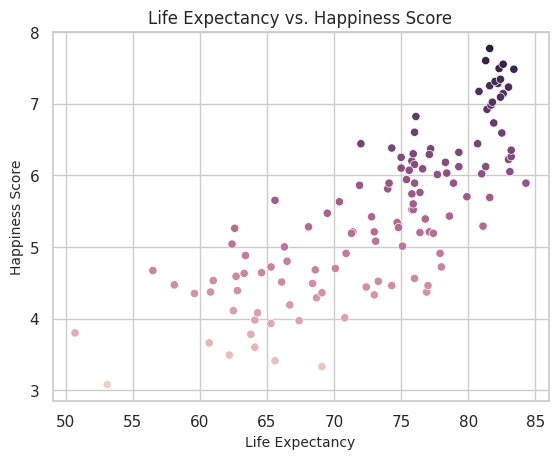

In [56]:
sns.scatterplot(x='life_expectancy', y='score', data=df, hue='score', legend=False)
plt.title('Life Expectancy vs. Happiness Score')
plt.xlabel('Life Expectancy', fontsize=10) 
plt.ylabel('Happiness Score', fontsize=10)
plt.show()

## GDP vs. Happiness Score

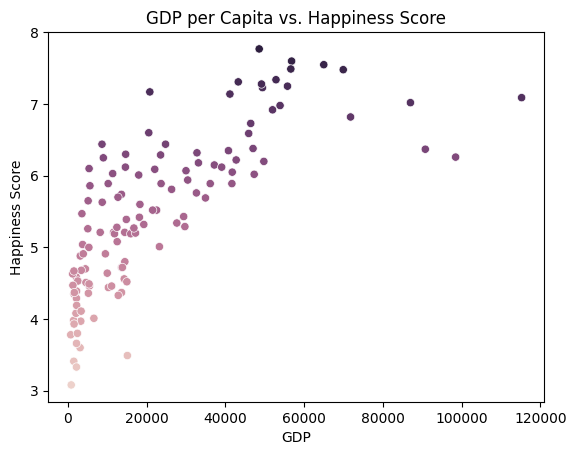

In [6]:
sns.scatterplot(x='gdp_per_capita_ppp', y='score', data=df, hue='score', legend=False)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP', fontsize=10) 
plt.ylabel('Happiness Score', fontsize=10)
plt.show()

## Life Expectancy vs. GDP

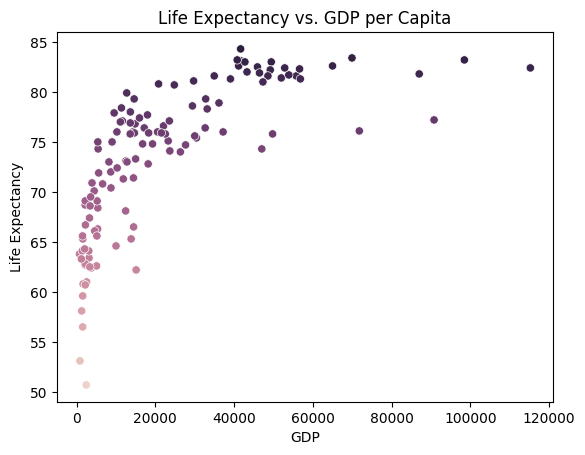

In [8]:
sns.scatterplot(x='gdp_per_capita_ppp', y='life_expectancy', data=df, hue='life_expectancy', legend=False)
plt.title('Life Expectancy vs. GDP per Capita')
plt.xlabel('GDP', fontsize=10) 
plt.ylabel('Life Expectancy', fontsize=10)
plt.show()

## Correlation Matrix

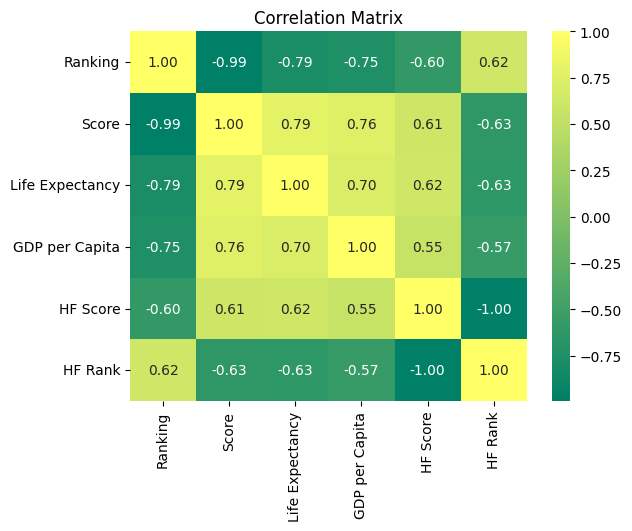

In [10]:
# select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

# custom labels
custom_labels = ['Ranking', 'Score', 'Life Expectancy', 'GDP per Capita', 'HF Score', 'HF Rank']

sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt='.2f', xticklabels=custom_labels, yticklabels=custom_labels)
plt.title('Correlation Matrix')
plt.show()

## Happiness Score Distribution by Country

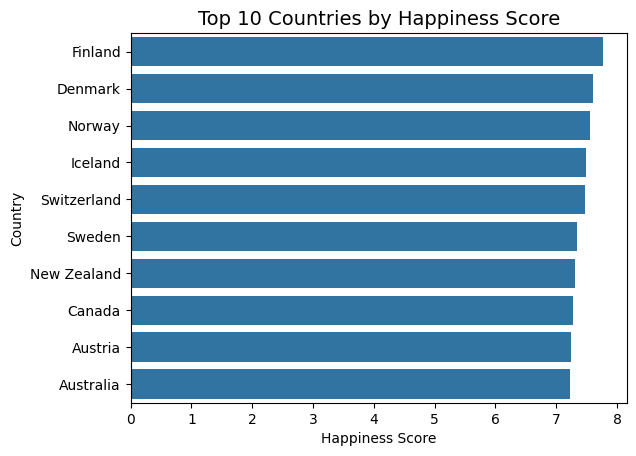

In [12]:
top_countries = df.sort_values(by='score', ascending=False).head(10)
sns.barplot(x='score', y='country', data=top_countries)
plt.title('Top 10 Countries by Happiness Score', fontsize=14)
plt.xlabel('Happiness Score', fontsize=10) 
plt.ylabel('Country', fontsize=10)
plt.show()

## Life Expectancy vs. Human Freedom Score

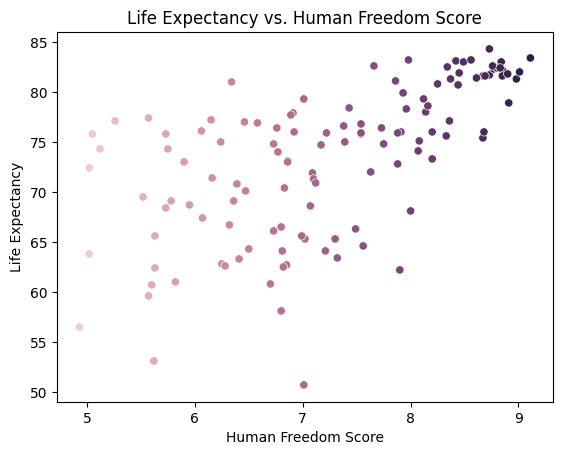

In [14]:
sns.scatterplot(x='hf_score', y='life_expectancy', data=df, hue='hf_score', legend=False)
plt.title('Life Expectancy vs. Human Freedom Score')

# Customize the labels
plt.xlabel('Human Freedom Score', fontsize=10) 
plt.ylabel('Life Expectancy', fontsize=10)

plt.show()

## GDP vs. Human Freedom Score

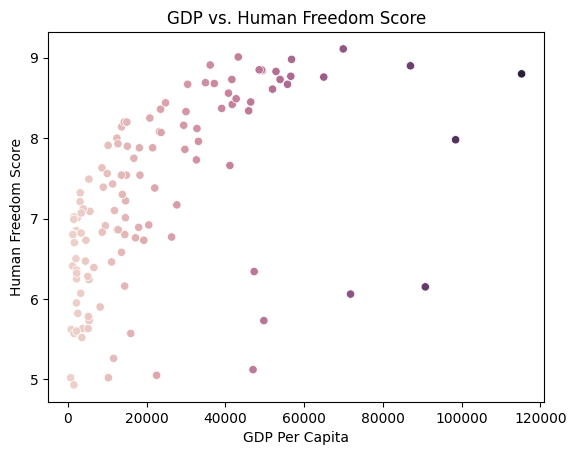

In [16]:
sns.scatterplot(x='gdp_per_capita_ppp', y='hf_score', data=df, hue='gdp_per_capita_ppp', legend=False)
plt.title('GDP vs. Human Freedom Score')
plt.xlabel('GDP Per Capita', fontsize=10)
plt.ylabel('Human Freedom Score', fontsize=10) 
plt.show()

## GDP per Capita vs. Human Freedom Score by Country

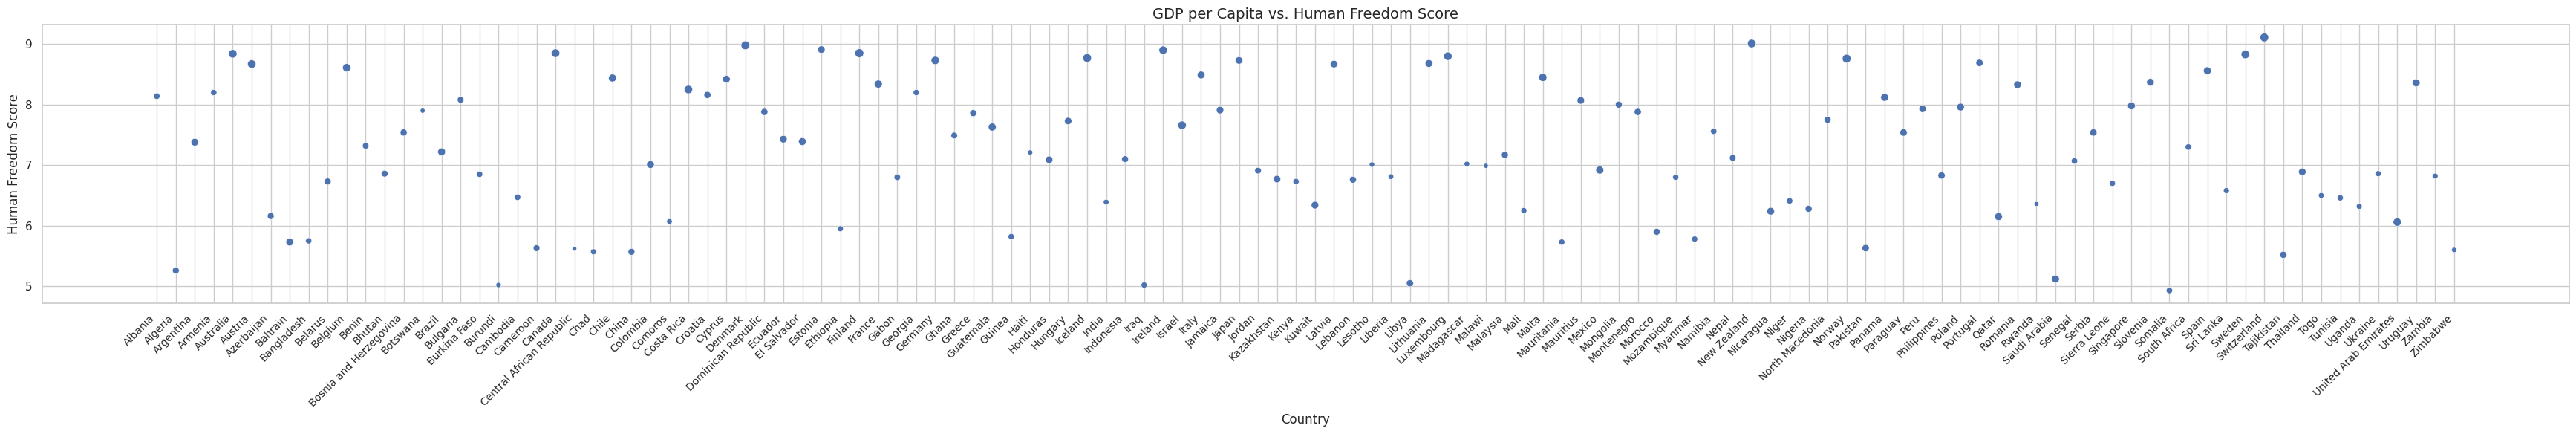

In [18]:
sns.set(style='whitegrid')

plt.figure(figsize=(35, 6))

# Scatter plot with country names
sns.scatterplot(x='country', y='hf_score', size='score', data=df, legend=False)

plt.title('GDP per Capita vs. Human Freedom Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Human Freedom Score', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplots_adjust(bottom=0.8)

plt.tight_layout()
plt.show()


## Country Rank by Human Freedom Rank

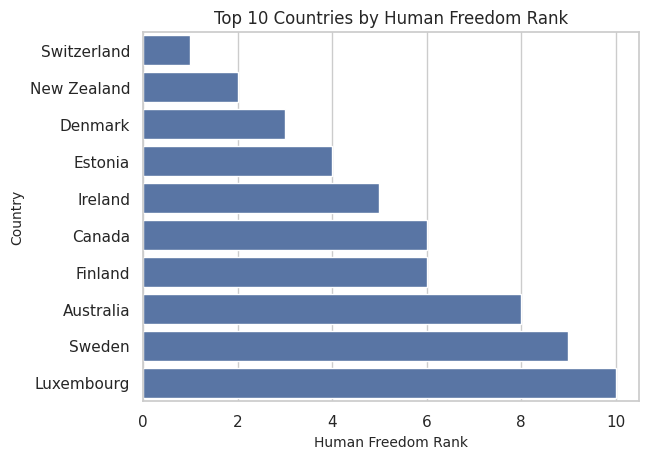

In [20]:
top_hf_countries = df.sort_values(by='hf_rank').head(10)
sns.barplot(x='hf_rank', y='country', data=top_hf_countries)
plt.title('Top 10 Countries by Human Freedom Rank')
plt.xlabel('Human Freedom Rank', fontsize=10)
plt.ylabel('Country', fontsize=10) 
plt.show()

## Interactive Visualizations

In [22]:
import plotly.express as px
fig = px.scatter(df, x='gdp_per_capita_ppp', y='score', color='country', hover_name='country')
fig.update_layout(
    title='GDP per Capita vs Happiness Score',
    xaxis_title='GDP per Capita', 
    yaxis_title='Happiness Score',
    legend_title='Country',
    hovermode='closest' # Ensures hover works smoothly
)

# customize displayed text on hover
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>' +
                  'GDP per Capita: %{x}<br>' +
                  'Happiness Score: %{y}<br>' 
)
fig.show()

## Interactive Bar Plot (Country Rankings vs Life Expectancy)

In [24]:
fig = px.bar(
    df, 
    x='country', 
    y='life_expectancy', 
    color='hf_score',  # Color bars based on hf_score
    title='Country vs Life Expectancy',
    labels={'life_expectancy': 'Life Expectancy', 'country': 'Country'},
    hover_data=['gdp_per_capita_ppp', 'hf_score']
)


fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Country',
    yaxis_title='Life Expectancy',
    showlegend=True,
    coloraxis_colorbar_title='HF Score'
)

# customize displayed text on hover
fig.update_traces(
    hovertemplate='Country: %{x}<br>' +
                  'Life Expectancy: %{y}<br>' +
                  'GDP per Capita (PPP): %{customdata[0]}<br>' + 
                  'HF Score: %{customdata[1]}<br>' 
)

fig.show()

## Interactive Bar Plot (GDP vs Life Expectancy)

In [26]:
fig = px.scatter(
    df, 
    x='gdp_per_capita_ppp', 
    y='life_expectancy', 
    size='score',  
    color='country',  
    hover_name='country',
    title='GDP vs Life Expectancy',
    labels={'gdp_per_capita_ppp': 'GDP per Capita (PPP)', 'life_expectancy': 'Life Expectancy'}
)

fig.update_layout(
    showlegend=False,
    xaxis_title='GDP per Capita',
    yaxis_title='Life Expectancy',
)

fig.update_traces(
    hovertemplate='<b>Country:</b> %{hovertext}<br>' +
                  '<b>GDP per Capita:</b> $%{x:,.2f}<br>' +
                  '<b>Life Expectancy:</b> %{y} years<br>' +
                  '<b>Happiness Score:</b> %{marker.size}<br>' +
                  '<extra></extra>'
)

fig.show()

## Life Expectancy vs HF Score

In [28]:
fig = px.scatter(
    df, 
    x='hf_score', 
    y='life_expectancy', 
    size='score',  # bubble size
    color='country',  # color points by country
    hover_name='country',  # show country name when hovering
    title='Life Expectancy vs HF Score',
    labels={'hf_score': 'HF Score', 'life_expectancy': 'Life Expectancy'}
)

fig.update_layout(
    showlegend=False,
    xaxis_title='HF Score',
    yaxis_title='Life Expectancy',
)

fig.update_traces(
    hovertemplate='<b>Country:</b> %{hovertext}<br>' +
                  '<b>HF Score:</b> %{x}<br>' +
                  '<b>Life Expectancy:</b> %{y} years<br>' +
                  '<b>Score:</b> %{marker.size}<br>' +
                  '<extra></extra>'
)

fig.show()

## Relationships between GDP per capita, life expectancy, and HF score

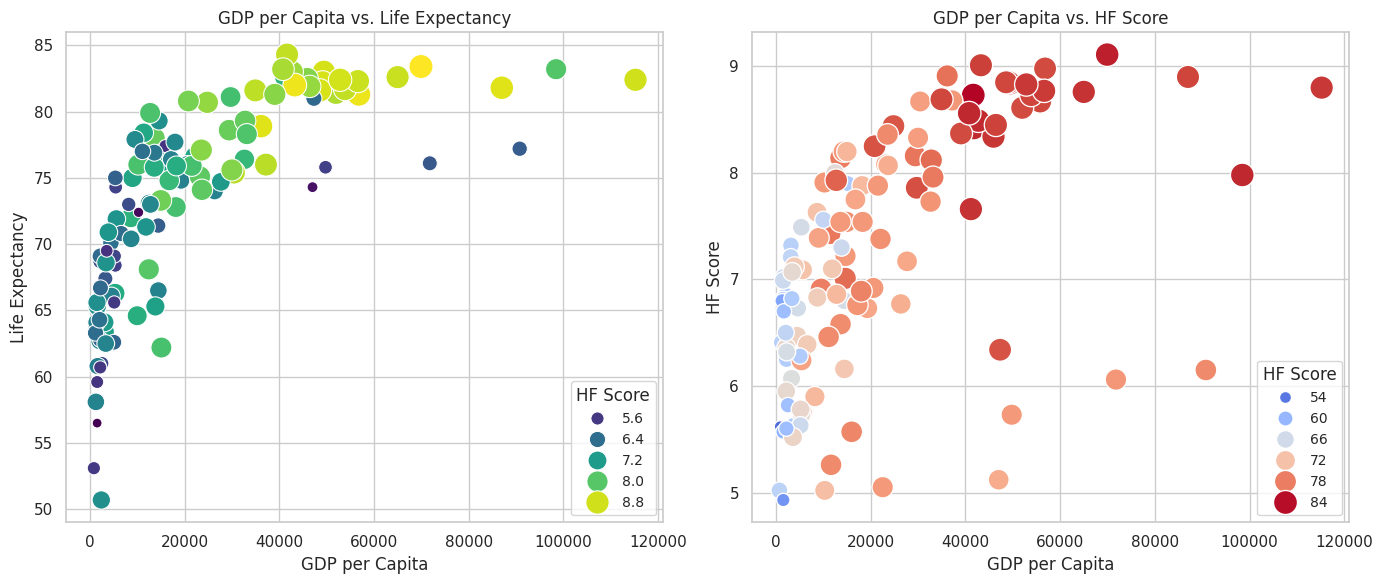

In [30]:
sns.set(style='whitegrid')

# GDP per Capita vs. Life Expectancy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='gdp_per_capita_ppp', y='life_expectancy', hue='hf_score', size='hf_score', 
                sizes=(50, 300), data=df, palette='viridis')
plt.title('GDP per Capita vs. Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(title='HF Score', fontsize=10)


# GDP per Capita vs. Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='gdp_per_capita_ppp', y='hf_score', hue='life_expectancy', size='life_expectancy', 
                sizes=(50, 300), data=df, palette='coolwarm')
plt.title('GDP per Capita vs. HF Score')
plt.xlabel('GDP per Capita')
plt.ylabel('HF Score')
plt.legend(title='HF Score', fontsize=10)

plt.tight_layout()
plt.show()


## Correlation matrix between Happiness Score, Life Expectancy and GDP

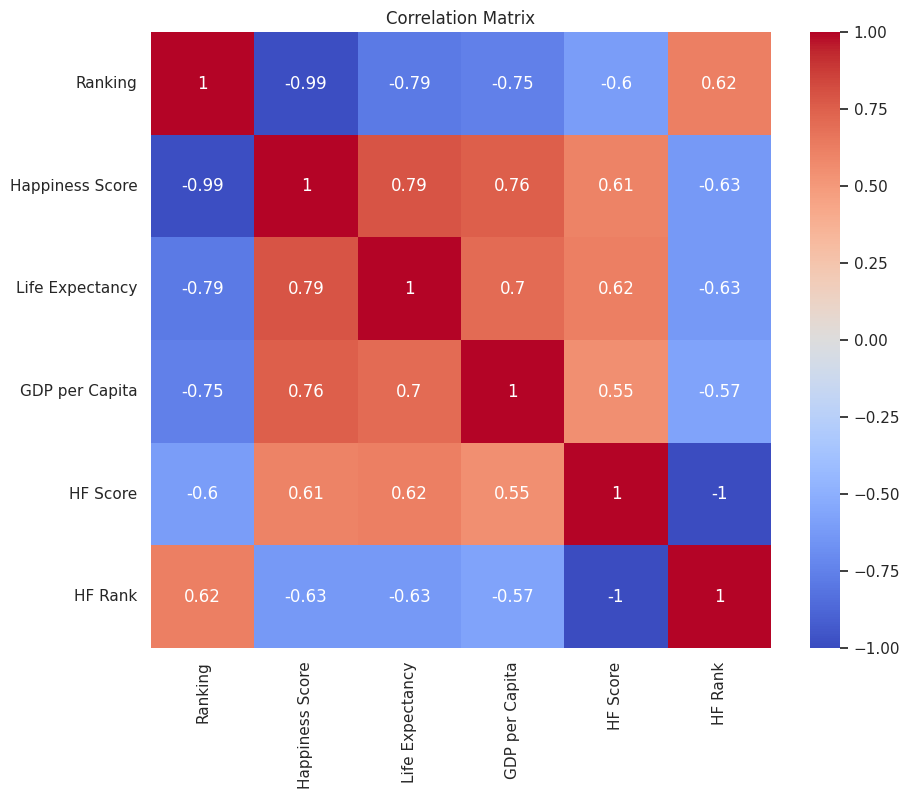

In [32]:
# compute the correlation matrix
corr_matrix = df[['ranking', 'score', 'life_expectancy', 'gdp_per_capita_ppp', 'hf_score', 'hf_rank']].corr()

# custom labels
custom_labels = ['Ranking', 'Happiness Score', 'Life Expectancy', 'GDP per Capita', 'HF Score', 'HF Rank']

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=custom_labels, yticklabels=custom_labels)
plt.title('Correlation Matrix')
plt.show()

In [33]:
corr_matrix = df[['ranking', 'score', 'life_expectancy', 'gdp_per_capita_ppp', 'hf_score', 'hf_rank']].corr()

custom_labels = ['Ranking', 'Happiness Score', 'Life Expectancy', 'GDP per Capita', 'HF Score', 'HF Rank']


fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=custom_labels,
        y=custom_labels,
        colorscale='viridis', 
        zmin=-1, zmax=1, 
        hoverongaps=False,
        text=corr_matrix.round(2).values, 
        hovertemplate='<b>%{x}</b> vs <b>%{y}</b><br>' + 
                      '<i>Correlation Value:</i> %{text}<br>' + 
                      '<extra></extra>'
    )
)


fig.update_layout(
    title='Correlation Matrix between Variables',
    xaxis_nticks=36,
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=800,
    height=800,
    showlegend=False,
    font=dict(size=14) 
)

fig.show()

## Relationship between GDP per capita and life expectancy, with the size of each bubble representing the HF score

In [35]:
fig = px.scatter(
    df,
    x='gdp_per_capita_ppp',
    y='life_expectancy',
    size='hf_score',  # bubble size
    hover_name='country',  # country names on hover
    title='GDP per Capita vs Life Expectancy (Bubble Size: HF Score)',
    labels={
        'gdp_per_capita_ppp': 'GDP per Capita',
        'life_expectancy': 'Life Expectancy',
        'hf_score':'HF Score'
    },
    color='hf_score',  # color based on hf_score
    color_continuous_scale='viridis'
)

fig.show()